
1) Возьмите **русский роман** (любой .txt) и повторите блок **Zipf + длинный хвост**.
2) Сравните предобработки: lowercasing, удаление пунктуации, замена "ё"→"е", лемматизация (если есть инструменты).
3) Добавьте 2 новых интента и правила (Matcher/regex).



In [48]:
!pip -q install spacy==3.7.5  nltk
!python -m spacy download ru_core_news_sm -q
!pip -q install pymorphy3 pymorphy3-dicts-ru
!pip -q install pandas
!pip -q install matplotlib


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


[+] Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [66]:
import pymorphy3
import re
morph = pymorphy3.MorphAnalyzer()
with open('NLP.txt', 'r') as f:
    ru_text=f.read()
ru_text=ru_text[580:300580]
ru_tokens = re.findall(r"[А-Яа-яЁё]+(?:-[А-Яа-яЁё]+)?", ru_text.lower())
ru_lemmas_pym = [morph.parse(w)[0].normal_form for w in ru_tokens]

PREPROCESSING:LOWER_MORPHY
Уникальных слов:  10927
Всего слов:  45403


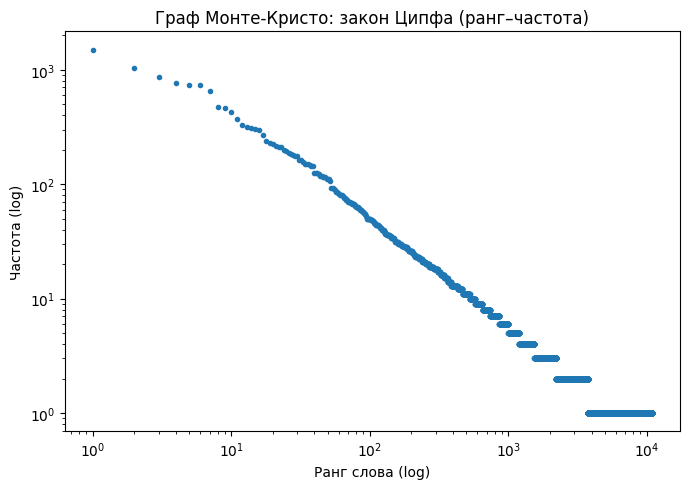

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("PREPROCESSING:LOWER_MORPHY")

from collections import Counter
import requests
cnt = Counter(ru_tokens)
V_types = len(cnt)

top20 = cnt.most_common(20)
top20[:10]

print("Уникальных слов: ",V_types)
N_tokens=sum(cnt.values())
print("Всего слов: ", N_tokens)

# Zipf данные
freqs_sorted = np.array(sorted(cnt.values(), reverse=True))
ranks = np.arange(1, len(freqs_sorted) + 1)

# 3.1 Zipf log-log
plt.figure(figsize=(7,5))
plt.loglog(ranks, freqs_sorted, marker=".", linestyle="none")
plt.title("Граф Монте-Кристо: закон Ципфа (ранг–частота)")
plt.xlabel("Ранг слова (log)")
plt.ylabel("Частота (log)")
plt.tight_layout()
plt.show()


PREPROCESSING:LOWER_MORPHY


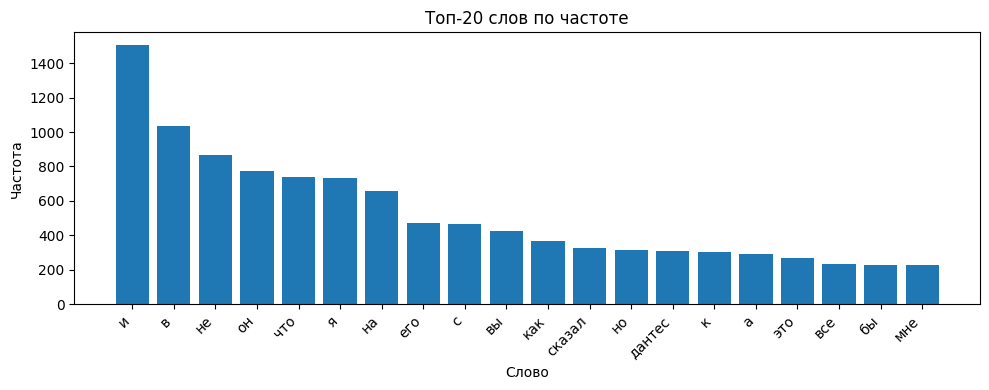

Хвост (c<=3): 9380 типов = 85.8% словаря
Хвост (c<=3): 12272 токенов = 27.0% текста


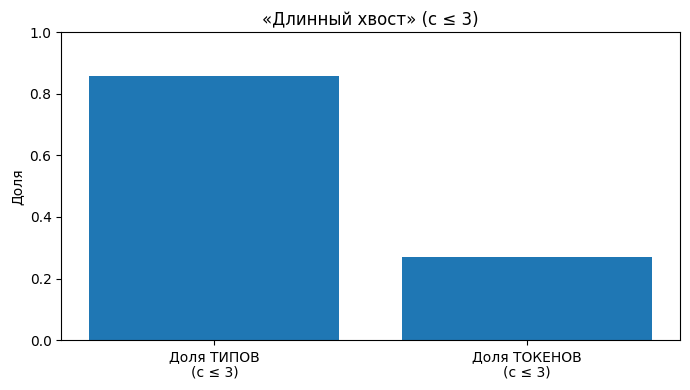

In [68]:
print("PREPROCESSING:LOWER_MORPHY")
# 3.2 Топ-20
df_top20 = pd.DataFrame(top20, columns=["word","count"])
plt.figure(figsize=(10,4))
plt.bar(df_top20["word"], df_top20["count"])
plt.title("Топ-20 слов по частоте")
plt.xlabel("Слово")
plt.ylabel("Частота")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# 3.3 Длинный хвост: <= 3
tail_words = [w for w, c in cnt.items() if c <= 3]
tail_types = len(tail_words)
tail_tokens = sum(cnt[w] for w in tail_words)

print(f"Хвост (c<=3): {tail_types} типов = {tail_types/V_types:.1%} словаря")
print(f"Хвост (c<=3): {tail_tokens} токенов = {tail_tokens/N_tokens:.1%} текста")

plt.figure(figsize=(7,4))
plt.bar(["Доля ТИПОВ\n(c ≤ 3)", "Доля ТОКЕНОВ\n(c ≤ 3)"],
        [tail_types/V_types, tail_tokens/N_tokens])
plt.ylim(0, 1)
plt.title("«Длинный хвост» (c ≤ 3)")
plt.ylabel("Доля")
plt.tight_layout()
plt.show()

PREPROCESSING:LEMMA_MORPHY
Уникальных слов:  5843
Всего слов:  45403


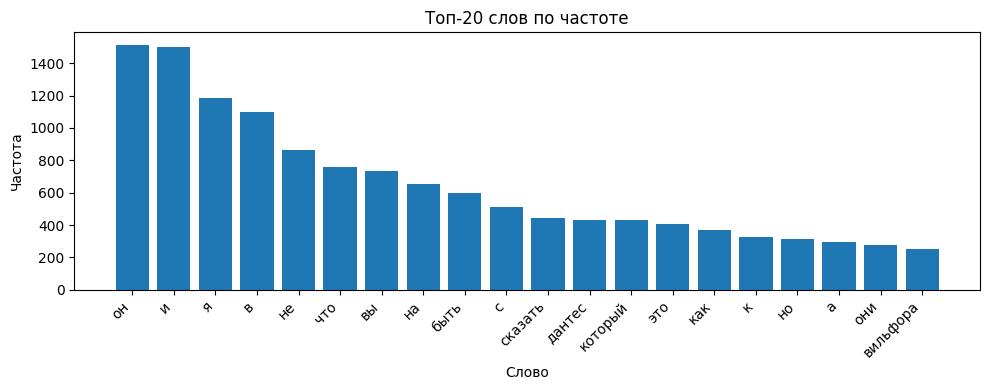

Хвост (c<=3): 4293 типов = 73.5% словаря
Хвост (c<=3): 6219 токенов = 13.7% текста


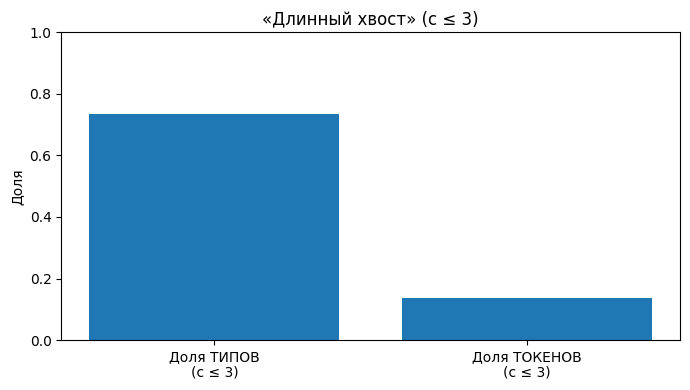

In [69]:
cnt = Counter(ru_lemmas_pym)
V_types = len(cnt)

print("PREPROCESSING:LEMMA_MORPHY")

top20 = cnt.most_common(20)
top20[:10]
print("Уникальных слов: ",V_types)
N_tokens=sum(cnt.values())
print("Всего слов: ", N_tokens)

# 3.2 Топ-20
df_top20 = pd.DataFrame(top20, columns=["word","count"])
plt.figure(figsize=(10,4))
plt.bar(df_top20["word"], df_top20["count"])
plt.title("Топ-20 слов по частоте")
plt.xlabel("Слово")
plt.ylabel("Частота")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# 3.3 Длинный хвост: <= 3
tail_words = [w for w, c in cnt.items() if c <= 3]
tail_types = len(tail_words)
tail_tokens = sum(cnt[w] for w in tail_words)

print(f"Хвост (c<=3): {tail_types} типов = {tail_types/V_types:.1%} словаря")
print(f"Хвост (c<=3): {tail_tokens} токенов = {tail_tokens/N_tokens:.1%} текста")

plt.figure(figsize=(7,4))
plt.bar(["Доля ТИПОВ\n(c ≤ 3)", "Доля ТОКЕНОВ\n(c ≤ 3)"],
        [tail_types/V_types, tail_tokens/N_tokens])
plt.ylim(0, 1)
plt.title("«Длинный хвост» (c ≤ 3)")
plt.ylabel("Доля")
plt.tight_layout()
plt.show()

In [70]:
import spacy
nlp = spacy.load("ru_core_news_sm")
text_nlp = nlp(ru_text)

PREPROCESSING:spaCy_token
Уникальных слов:  11603
Всего слов:  62720


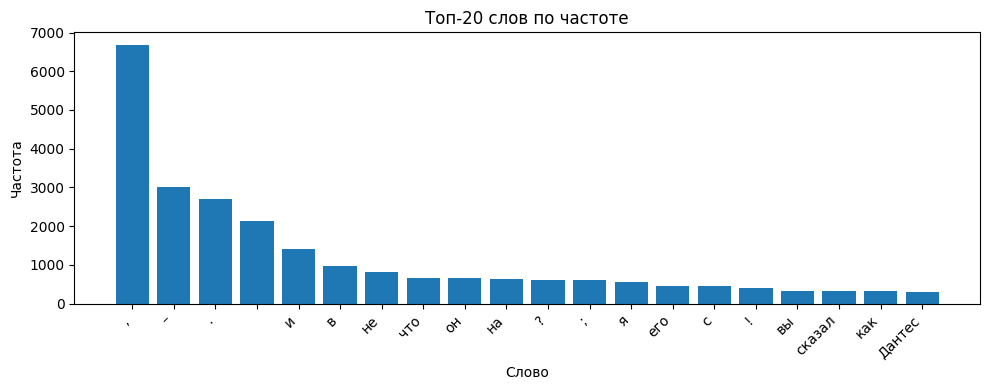

Хвост (c<=3): 9976 типов = 86.0% словаря
Хвост (c<=3): 13004 токенов = 20.7% текста


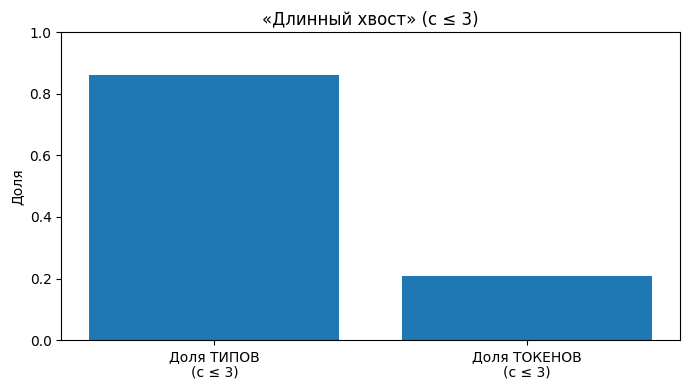

In [71]:
print("PREPROCESSING:spaCy_token")

tokens = [token.text for token in text_nlp ]
cnt = Counter(tokens)
V_types = len(cnt)

top20 = cnt.most_common(20)
top20[:10]
print("Уникальных слов: ",V_types)
N_tokens=sum(cnt.values())
print("Всего слов: ", N_tokens)

# 3.2 Топ-20
df_top20 = pd.DataFrame(top20, columns=["word","count"])
plt.figure(figsize=(10,4))
plt.bar(df_top20["word"], df_top20["count"])
plt.title("Топ-20 слов по частоте")
plt.xlabel("Слово")
plt.ylabel("Частота")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# 3.3 Длинный хвост: <= 3
tail_words = [w for w, c in cnt.items() if c <= 3]
tail_types = len(tail_words)
tail_tokens = sum(cnt[w] for w in tail_words)

print(f"Хвост (c<=3): {tail_types} типов = {tail_types/V_types:.1%} словаря")
print(f"Хвост (c<=3): {tail_tokens} токенов = {tail_tokens/N_tokens:.1%} текста")

plt.figure(figsize=(7,4))
plt.bar(["Доля ТИПОВ\n(c ≤ 3)", "Доля ТОКЕНОВ\n(c ≤ 3)"],
        [tail_types/V_types, tail_tokens/N_tokens])
plt.ylim(0, 1)
plt.title("«Длинный хвост» (c ≤ 3)")
plt.ylabel("Доля")
plt.tight_layout()
plt.show()

PREPROCESSING:spaCy_no_punct|space
Уникальных слов:  11581
Всего слов:  45741


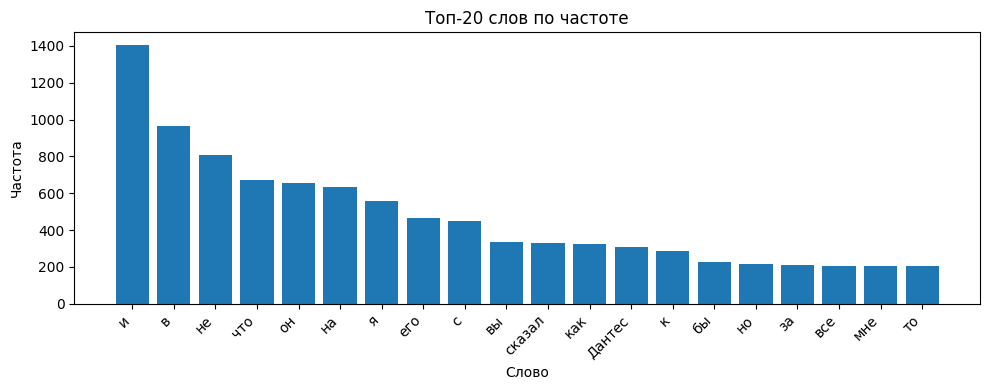

Хвост (c<=3): 9974 типов = 86.1% словаря
Хвост (c<=3): 13001 токенов = 28.4% текста


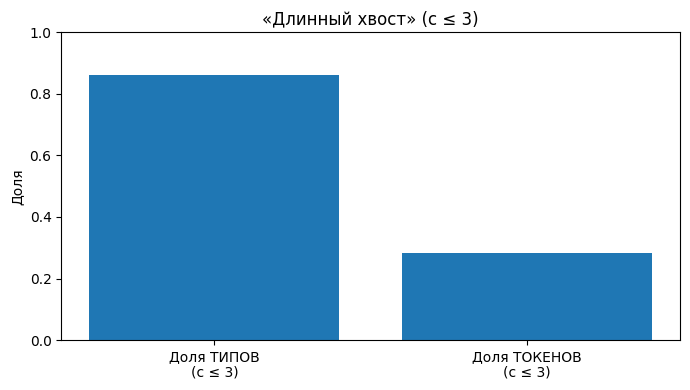

In [74]:
print("PREPROCESSING:spaCy_no_punct|space")

tokens = [token.text for token in text_nlp if not token.is_punct and not token.is_space]
cnt = Counter(tokens)
V_types = len(cnt)

top20 = cnt.most_common(20)
top20[:10]
print("Уникальных слов: ",V_types)
N_tokens=sum(cnt.values())
print("Всего слов: ", N_tokens)

# 3.2 Топ-20
df_top20 = pd.DataFrame(top20, columns=["word","count"])
plt.figure(figsize=(10,4))
plt.bar(df_top20["word"], df_top20["count"])
plt.title("Топ-20 слов по частоте")
plt.xlabel("Слово")
plt.ylabel("Частота")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# 3.3 Длинный хвост: <= 3
tail_words = [w for w, c in cnt.items() if c <= 3]
tail_types = len(tail_words)
tail_tokens = sum(cnt[w] for w in tail_words)

print(f"Хвост (c<=3): {tail_types} типов = {tail_types/V_types:.1%} словаря")
print(f"Хвост (c<=3): {tail_tokens} токенов = {tail_tokens/N_tokens:.1%} текста")

plt.figure(figsize=(7,4))
plt.bar(["Доля ТИПОВ\n(c ≤ 3)", "Доля ТОКЕНОВ\n(c ≤ 3)"],
        [tail_types/V_types, tail_tokens/N_tokens])
plt.ylim(0, 1)
plt.title("«Длинный хвост» (c ≤ 3)")
plt.ylabel("Доля")
plt.tight_layout()
plt.show()

In [75]:
text_ru_e = ru_text.replace('ё', 'е').replace('Ё', 'Е')
nlp = spacy.load("ru_core_news_sm")
text_nlp = nlp(text_ru_e)

PREPROCESSING:spaCy_"ё->e"
Уникальных слов:  11581
Всего слов:  45741


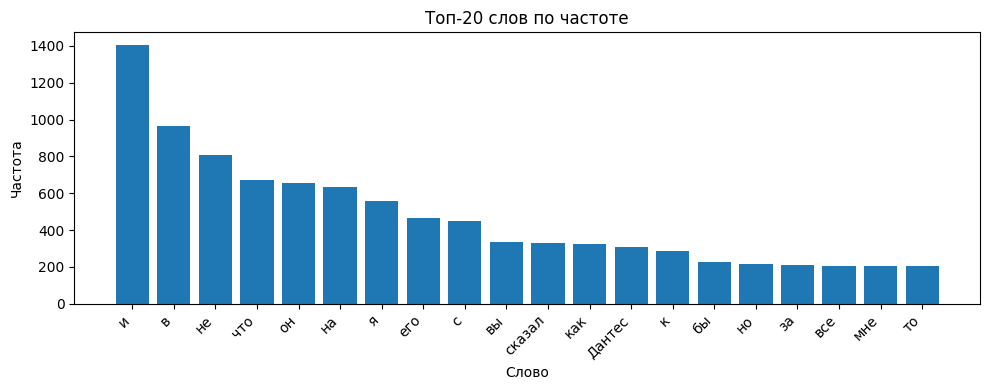

Хвост (c<=3): 9974 типов = 86.1% словаря
Хвост (c<=3): 13001 токенов = 28.4% текста


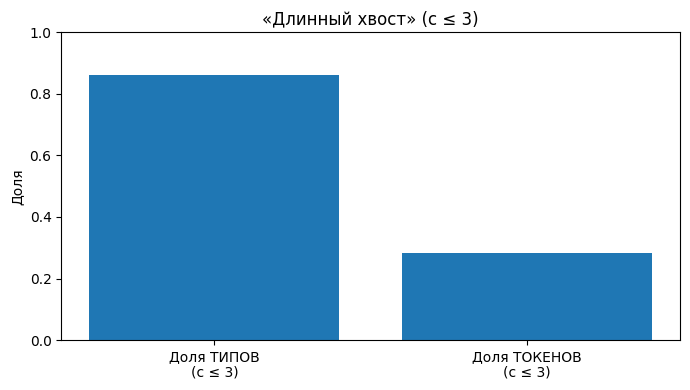

In [76]:
print('PREPROCESSING:spaCy_"ё->e"')

tokens = [token.text for token in text_nlp if not token.is_punct and not token.is_space]

cnt = Counter(tokens)
V_types = len(cnt)

top20 = cnt.most_common(20)
top20[:10]
print("Уникальных слов: ",V_types)
N_tokens=sum(cnt.values())
print("Всего слов: ", N_tokens)

# 3.2 Топ-20
df_top20 = pd.DataFrame(top20, columns=["word","count"])
plt.figure(figsize=(10,4))
plt.bar(df_top20["word"], df_top20["count"])
plt.title("Топ-20 слов по частоте")
plt.xlabel("Слово")
plt.ylabel("Частота")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# 3.3 Длинный хвост: <= 3
tail_words = [w for w, c in cnt.items() if c <= 3]
tail_types = len(tail_words)
tail_tokens = sum(cnt[w] for w in tail_words)

print(f"Хвост (c<=3): {tail_types} типов = {tail_types/V_types:.1%} словаря")
print(f"Хвост (c<=3): {tail_tokens} токенов = {tail_tokens/N_tokens:.1%} текста")

plt.figure(figsize=(7,4))
plt.bar(["Доля ТИПОВ\n(c ≤ 3)", "Доля ТОКЕНОВ\n(c ≤ 3)"],
        [tail_types/V_types, tail_tokens/N_tokens])
plt.ylim(0, 1)
plt.title("«Длинный хвост» (c ≤ 3)")
plt.ylabel("Доля")
plt.tight_layout()
plt.show()

In [77]:
nlp = spacy.load("ru_core_news_sm")
text_nlp = nlp(ru_text)
lemmas = [token.lemma_ for token in text_nlp if not token.is_punct and not token.is_space]

PREPROCESSING:spaCy_lemma_no_punct|space
Уникальных слов:  6677
Всего слов:  45741


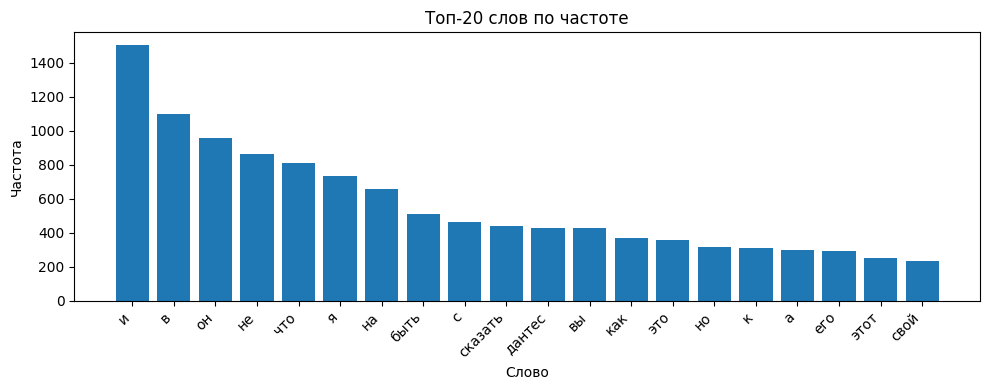

Хвост (c<=3): 5102 типов = 76.4% словаря
Хвост (c<=3): 7062 токенов = 15.4% текста


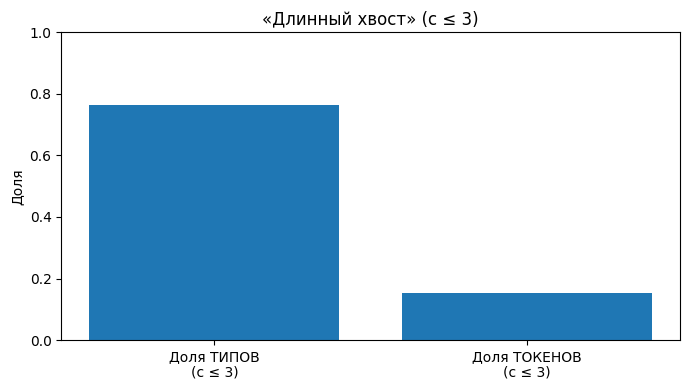

In [78]:
print('PREPROCESSING:spaCy_lemma_no_punct|space')
cnt = Counter(lemmas)
V_types = len(cnt)

top20 = cnt.most_common(20)
top20[:10]
print("Уникальных слов: ",V_types)
N_tokens=sum(cnt.values())
print("Всего слов: ", N_tokens)
# 3.2 Топ-20
df_top20 = pd.DataFrame(top20, columns=["word","count"])
plt.figure(figsize=(10,4))
plt.bar(df_top20["word"], df_top20["count"])
plt.title("Топ-20 слов по частоте")
plt.xlabel("Слово")
plt.ylabel("Частота")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# 3.3 Длинный хвост: <= 3
tail_words = [w for w, c in cnt.items() if c <= 3]
tail_types = len(tail_words)
tail_tokens = sum(cnt[w] for w in tail_words)

print(f"Хвост (c<=3): {tail_types} типов = {tail_types/V_types:.1%} словаря")
print(f"Хвост (c<=3): {tail_tokens} токенов = {tail_tokens/N_tokens:.1%} текста")

plt.figure(figsize=(7,4))
plt.bar(["Доля ТИПОВ\n(c ≤ 3)", "Доля ТОКЕНОВ\n(c ≤ 3)"],
        [tail_types/V_types, tail_tokens/N_tokens])
plt.ylim(0, 1)
plt.title("«Длинный хвост» (c ≤ 3)")
plt.ylabel("Доля")
plt.tight_layout()
plt.show()

In [98]:
from spacy.matcher import Matcher

matcher = Matcher(nlp.vocab)

pattern_greet = [{"LOWER": {"IN": ["привет","здравствуйте"]}}]
pattern_goodbye = [{"LOWER": {"IN": ["прощайте","до свидания"]}}]

matcher.add("GREET", [pattern_greet])
matcher.add("GOODBYE", [pattern_goodbye])

def detect_intent(text: str):
    doc = nlp(text)
    matches = matcher(doc)
    
    label_counts = Counter()
    for match_id, start, end in matches:
        label = nlp.vocab.strings[match_id]
        label_counts[label] += 1
    
    intent_counts = {
        "greeting": label_counts.get("GREET", 0),
        "goodbye": label_counts.get("GOODBYE", 0)
    }
    
    return intent_counts

print(detect_intent(ru_text))

{'greeting': 2, 'goodbye': 2}
